### Описание задачи
Компания-застройщик закупает строительные материалы. У вас есть база, содержащая цены по 150 материалам. Ваша задача проанализировать цены на материалы и категории:
1.	Постройте таблицу со средневзвешенными ценами материалов по месяцам
2.	Ответьте на вопросы:
-	На сколько в среднем подорожали материалы с начала 2020 года?
-	По каким материалам и категориям наблюдается самый сильный рост цен?
-	По некоторым материалам есть цена рынка. Сравните цены внутри компании с ценами рынка, на сколько они отличаются?
3.	Сделайте 2-3 слайда с визуализацией ваших выводов (шаблон для презентации во вложении).»

# 1. Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime
from scipy import stats as st



In [2]:
df = pd.read_excel(r'samolet.xlsx', engine='openpyxl')


In [3]:
df.head()

,Категория,Материал,Дата счета,Ед.изм.,Объем,Цена руб,сумма,Цена рынка
0,Категория 2,Материал 22,08.12.2020,шт.,1.00,936,936.00,
1,Категория 2,Материал 22,08.12.2020,шт.,1.00,936,936.00,
2,Категория 7,Материал 25,14.09.2020,т,0.02,46370,927.40,40590
3,Категория 7,Материал 26,15.04.2020,м3,0.24,3841,921.84,
4,Категория 2,Материал 36,02.06.2020,компл,1.00,895,895.00,


In [4]:
#Поменяем названия столбцов для удобства
df.set_axis(['category', 'material', 'date', 'unit', 'amount', 'price', 'sum', 'marketprice'],axis = 'columns',inplace = True)
df.columns

Index(['category', 'material', 'date', 'unit', 'amount', 'price', 'sum',
       'marketprice'],
      dtype='object')

Уберем лишнюю информацию и скрытые пробелы

In [5]:
df.category = df.category.str.replace('Категория', '')

In [6]:
df.material = df.material.str.replace('Материал', '')

In [7]:
df.columns = df.columns.str.replace(' ', '')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15711 entries, 0 to 15710
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     15711 non-null  object 
 1   material     15711 non-null  object 
 2   date         15711 non-null  object 
 3   unit         15562 non-null  object 
 4   amount       15711 non-null  float64
 5   price        15711 non-null  int64  
 6   sum          15711 non-null  float64
 7   marketprice  15711 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 982.1+ KB


Поменяем тип данных столбцов "marketprice", "category", "material" на числовой

In [9]:
df['marketprice'] = pd.to_numeric(df['marketprice'], errors='coerce') 

In [10]:
df['category'] = pd.to_numeric(df['category'], errors='coerce') 

In [11]:
df['material'] = pd.to_numeric(df['material'], errors='coerce') 

Проверим данные в столбце с единицами измерения

In [12]:
df['unit'].value_counts()

шт.       5678
м3        4553
т         3327
м2         871
кг         710
компл      299
пог. м     123
руб          1
Name: unit, dtype: int64

Исправим ошибку с рублями в единицах измерения просто для красоты, хоть это и не влияет на наши будущие расчеты

In [13]:
df[df.unit == 'руб']

,category,material,date,unit,amount,price,sum,marketprice
865,14,411,24.01.2020,руб,1178890.8,1,1178890.8,NaN


In [14]:
df[df.material == 411]

,category,material,date,unit,amount,price,sum,marketprice
520,14,411,22.06.2020,м2,1595432.03,1,1595432.03,NaN
579,14,411,21.08.2020,м2,1524003.15,1,1524003.15,NaN
721,14,411,22.06.2020,м2,1343833.60,1,1343833.60,NaN
865,14,411,24.01.2020,руб,1178890.80,1,1178890.80,NaN
1115,14,411,17.03.2021,м2,991174.66,1,991174.66,NaN
1183,14,411,19.10.2020,м2,11341.20,85,964002.00,NaN
1527,14,411,26.02.2020,м2,831531.60,1,831531.60,NaN
1535,14,411,11.03.2020,м2,828500.88,1,828500.88,NaN
1684,14,411,21.12.2020,м2,9295.20,86,799387.20,NaN
2915,14,411,28.02.2020,м2,578304.24,1,578304.24,NaN


In [15]:
df['unit'].replace({"руб" : "м2"}, inplace=True)

In [16]:
df['unit'].value_counts()

шт.       5678
м3        4553
т         3327
м2         872
кг         710
компл      299
пог. м     123
Name: unit, dtype: int64

In [17]:
df['date_parsed'] = pd.to_datetime(df['date'], format="%d.%m.%Y")

In [18]:
df.date_parsed = df.date_parsed.dt.strftime('%Y-%m')

In [19]:
df.head()

,category,material,date,unit,amount,price,sum,marketprice,date_parsed
0,2,22,08.12.2020,шт.,1.00,936,936.00,NaN,2020-12
1,2,22,08.12.2020,шт.,1.00,936,936.00,NaN,2020-12
2,7,25,14.09.2020,т,0.02,46370,927.40,40590.0,2020-09
3,7,26,15.04.2020,м3,0.24,3841,921.84,NaN,2020-04
4,2,36,02.06.2020,компл,1.00,895,895.00,NaN,2020-06


Отсортируем таблицу по дате.

In [20]:
df = df.sort_values(by="date_parsed")

In [21]:
df = df.reset_index(drop=True)

In [22]:
df.head()

,category,material,date,unit,amount,price,sum,marketprice,date_parsed
0,14,717,31.01.2020,шт.,1200.00,54,64800.00,NaN,2020-01
1,14,618,24.01.2020,м3,76.03,1835,139515.05,NaN,2020-01
2,14,618,28.01.2020,м3,76.03,1835,139515.05,NaN,2020-01
3,14,618,28.01.2020,м3,76.03,1835,139515.05,NaN,2020-01
4,14,618,30.01.2020,м3,76.03,1835,139515.05,NaN,2020-01


Сгруппируем данные по категории, материалу и дате.

In [23]:
df_table = df.groupby(['category', 'material', 'date_parsed'],as_index = False)[['amount', 'sum']].sum()

In [24]:
df_table

,category,material,date_parsed,amount,sum
0,2,22,2020-02,318.00,224508.00
1,2,22,2020-03,588.00,472650.00
2,2,22,2020-06,572.00,540540.00
3,2,22,2020-07,2698.00,2105270.00
4,2,22,2020-08,4380.00,3779940.00
...,...,...,...,...,...
1184,14,1456,2020-04,6336.00,152064.00
1185,14,1456,2020-05,25344.00,608256.00
1186,14,1456,2020-06,38016.00,912384.00
1187,14,1456,2020-07,19008.00,468864.00


In [25]:
df_table.material.value_counts().tail(20)

293    2
271    2
278    2
282    2
275    2
596    2
294    1
279    1
276    1
273    1
290    1
318    1
295    1
296    1
272    1
277    1
283    1
299    1
308    1
322    1
Name: material, dtype: int64

Удалим товары с одним значением, т.к. по ним мы не сможем провести анализ динамики цены.

In [26]:
one_item = [276, 283, 277, 272, 294, 279, 273, 290, 318, 295, 296, 299, 308, 322 ]

In [27]:
df_table = df_table.query('material not in @one_item').reset_index(drop=True)

In [28]:
df_table.material.value_counts()

309    17
314    17
288    17
460    17
813    17
       ..
280     2
291     2
292     2
293     2
307     2
Name: material, Length: 136, dtype: int64

Посчитаем среднемесячную цену

In [29]:
df_table['price'] = df_table['sum'] / df_table['amount']

Сохраним таблицу со средневзвешенными ценами материалов по месяцам в файл

In [30]:
df_table.to_excel('final.xlsx')

Для будущего сравнения цен в компании с ценами рынка сделаем отдельно таблицу, в которой будут заполнены все поля с ценой по рынку 

In [31]:
df_market = df[df.marketprice == df.marketprice]

In [32]:
df_market = df_market.reset_index(drop=True)

In [33]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     3857 non-null   int64  
 1   material     3857 non-null   int64  
 2   date         3857 non-null   object 
 3   unit         3826 non-null   object 
 4   amount       3857 non-null   float64
 5   price        3857 non-null   int64  
 6   sum          3857 non-null   float64
 7   marketprice  3857 non-null   float64
 8   date_parsed  3857 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 271.3+ KB


In [34]:
df_market['market_sum'] = df_market['amount'] * df_market['marketprice']

In [35]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     3857 non-null   int64  
 1   material     3857 non-null   int64  
 2   date         3857 non-null   object 
 3   unit         3826 non-null   object 
 4   amount       3857 non-null   float64
 5   price        3857 non-null   int64  
 6   sum          3857 non-null   float64
 7   marketprice  3857 non-null   float64
 8   date_parsed  3857 non-null   object 
 9   market_sum   3857 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 301.5+ KB


### 2. Исследовательский анализ данных

2.1. Чтобы узнать, на сколько в среднем подорожали материалы с начала 2020 года, посчитаем разницу между первоначальной ценой и конечной ценой.

In [36]:
def diff(x):
    return ((x.values[-1] - x.values[0]) / x.values[0] * 100) #возвращает относительную разницу в % между последним и первональным значением
df_diff = df_table.groupby(['category', 'material'],as_index = False).agg({'amount': sum, 'price': diff})
df_diff.head()

,category,material,amount,price
0,2,22,10548.0,32.577904
1,2,36,47734.0,24.418534
2,2,269,61.0,-0.056852
3,2,270,61.0,-0.056956
4,2,275,10.0,-8.644163


In [37]:
df_diff.columns = df_diff.columns.str.replace('price', 'diff_price')

In [38]:
df_diff.head()

,category,material,amount,diff_price
0,2,22,10548.0,32.577904
1,2,36,47734.0,24.418534
2,2,269,61.0,-0.056852
3,2,270,61.0,-0.056956
4,2,275,10.0,-8.644163


In [39]:
mean_diff = df_diff['diff_price'].mean()
mean_diff

4.2698891044864835

In [40]:
weighted_avg = round(np.average( df_diff['diff_price'], weights = df_diff['amount']),2)

weighted_avg

-2.69

2.2. Посмотрим, по каким материалам и категориям наблюдается самый сильный рост цен.

Топ-10 материалов, по которым был максимальный рост цен.

In [41]:
top10_m = df_diff.sort_values('diff_price', ascending=False).head(10).reset_index(drop=True)
top10_m

,category,material,amount,diff_price
0,3,537,253000.00,66.666667
1,7,315,916.88,53.150144
2,7,538,186.39,50.456483
3,7,101,6989.07,44.036377
4,7,284,7130.02,43.458186
5,7,533,194.11,41.602300
6,2,451,15346.00,40.948307
7,7,356,1128.13,39.308573
8,4,345,2324.00,37.344442
9,8,596,672.00,33.511234


In [42]:
top10_m['material']= top10_m['material'].apply(str)

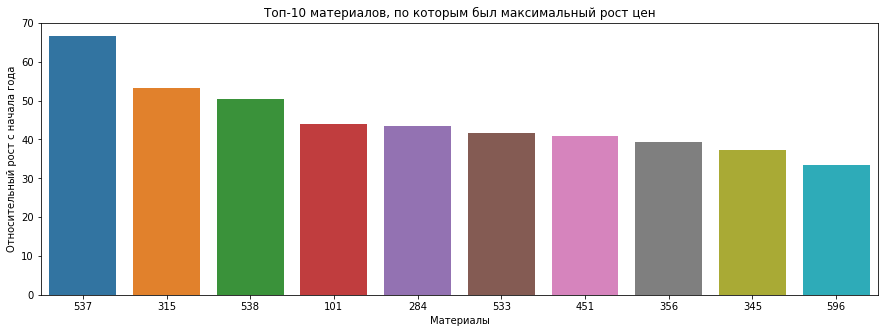

In [43]:
#Построим график «Топ-10 материалов, по которым был максимальный рост цен»:
plt.figure(figsize=(15,5))
plt.title("Топ-10 материалов, по которым был максимальный рост цен")
sns.barplot(x=top10_m['material'], y=top10_m['diff_price'])
plt.xlabel("Материалы")
plt.ylabel("Относительный рост с начала года")
plt.show()

Сделаем аналогичное действие по категориям

In [44]:
df_table_cat = df_table.groupby(['category', 'date_parsed'],as_index = False)[['amount', 'sum']].sum()

In [45]:
df_table_cat['price'] = df_table_cat['sum'] / df_table_cat['amount']

In [46]:
df_table_cat.head()

,category,date_parsed,amount,sum,price
0,2,2020-01,311037.52,25305933.91,81.359747
1,2,2020-02,575556.74,28863308.20,50.148502
2,2,2020-03,2800846.52,50570219.03,18.055334
3,2,2020-04,2108561.56,30910523.60,14.659531
4,2,2020-05,193902.06,14721759.36,75.923687


In [47]:
df_diff_cat = df_table_cat.groupby(['category'],as_index = False).agg({'price': diff})
df_diff_cat.head()

,category,price
0,2,-85.325108
1,3,-57.328051
2,4,-33.778089
3,7,-48.031923
4,8,73.492589


In [48]:
top3_c = df_diff_cat.sort_values('price', ascending=False).head(3).reset_index(drop=True)
top3_c['category']= top3_c['category'].apply(str)
top3_c

,category,price
0,14,456.277795
1,8,73.492589
2,11,48.930288


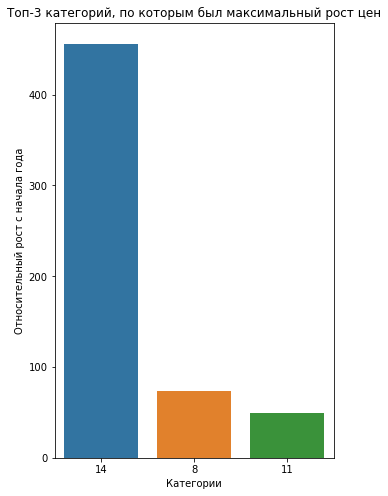

In [49]:
#Построим график «Топ-3, по которым был максимальный рост цен»:
plt.figure(figsize=(5,8))
plt.title("Топ-3 категорий, по которым был максимальный рост цен")
sns.barplot(x=top3_c['category'], y=top3_c['price'])
plt.xlabel("Категории")
plt.ylabel("Относительный рост с начала года")
plt.show()

In [51]:
df_market

,category,material,date,unit,amount,price,sum,marketprice,date_parsed,market_sum
0,7,25,27.01.2020,т,3.40,34664,117857.60,34990.0,2020-01,118966.0
1,7,150,24.01.2020,т,7.47,36629,273618.63,36790.0,2020-01,274821.3
2,7,150,24.01.2020,т,2.97,36662,108886.14,36790.0,2020-01,109266.3
3,7,150,24.01.2020,т,28.15,36507,1027672.05,36790.0,2020-01,1035638.5
4,7,538,24.01.2020,т,8.46,32296,273224.16,32490.0,2020-01,274865.4
...,...,...,...,...,...,...,...,...,...,...
3852,7,284,01.03.2021,т,10.01,47113,471601.13,63990.0,2021-03,640539.9
3853,7,315,03.03.2021,т,10.22,46773,478020.06,59590.0,2021-03,609009.8
3854,7,101,01.03.2021,т,20.31,46701,948497.31,63990.0,2021-03,1299636.9
3855,7,284,03.03.2021,т,10.00,47118,471180.00,63990.0,2021-03,639900.0


In [52]:
df_market['diff'] = (df_market['marketprice'] - df_market['price'])/ df_market['price'] * 100

### 3. Проверка гипотезы
Сравним цены внутри компании с ценами рынка.
Сформулируем нулевую гипотезу:средние значения цен внутри компании и рынка равны. Сформулируем альтернативную гипотезу:средние значения цен внутри компании и рынка не равны.

In [53]:
# Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind()
sample_1 = df_market['price'] # sample_1 - выборка из цен внутри компании
sample_2 = df_market['marketprice'] # sample_2 - выборка из цен рынка
alpha = 0.05 # пороговое значение для p-value, при котором еще нельзя отбрасывать нулевую гипотезу. Ниже уже отбрасываем.
results = st.ttest_ind(sample_1, sample_2, equal_var = True)
# equal_var - считать ли равными дисперсии выборок, по умолчанию имеет значение True. Считать, т.к. выборки схожи.
print('p-значение: ', results.pvalue)
if alpha <= results.pvalue:
    print ('Не отвергаем нулевую гипотезу')
else:
    print ('Отвергаем нулевую гипотезу')

p-значение:  0.013597605423490498
Отвергаем нулевую гипотезу


Вывод: p-значение близко к 1. Таким образом вероятность получить наблюдаемый результат
при условии, что нулевая гипотеза верна, близка к 1%. В связи с этим у нас есть веское основание отбросить нулевую гипотезу и придерживаться альтернативной.

In [54]:
def indicators(data):
    print("Среднее - {}, медиана - {}".format(round(data.mean(),2), round(data.median(),2)))

In [55]:
indicators(df_market['price'])


Среднее - 27650.45, медиана - 34800.0


In [56]:
indicators(df_market['marketprice'])

Среднее - 28527.6, медиана - 34990.0


In [57]:
our_average = round(np.average( df_market['price'], weights = df_market['amount']),2)
our_average

1837.85

In [58]:
market_average = round(np.average( df_market['marketprice'], weights = df_market['amount']),2)
market_average

2052.54

In [59]:
d = {'kind': ['Самолет', 'Рынок'], 'mean': [27650.45, 28527.6], 'median': [34800.0, 34990.0] , "weighted_average": [1837.85, 2052.54 ]}

In [60]:
df_indicators = pd.DataFrame(data=d)
df_indicators

,kind,mean,median,weighted_average
0,Самолет,27650.45,34800.0,1837.85
1,Рынок,28527.60,34990.0,2052.54


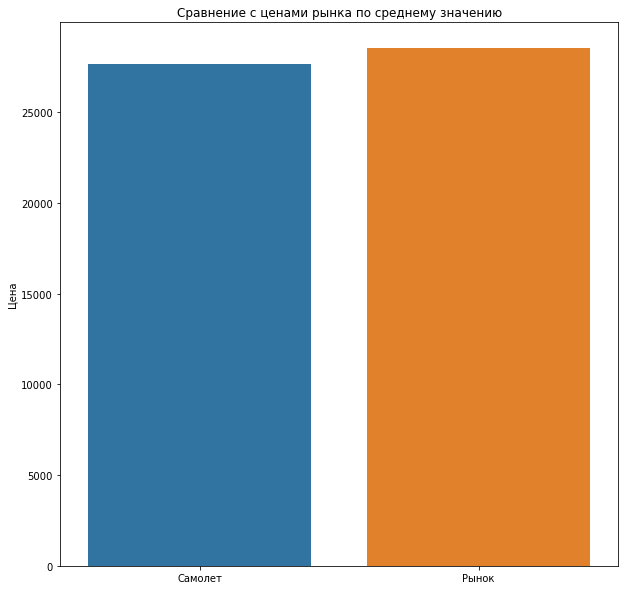

In [61]:
plt.figure(figsize=(10,10))
plt.title("Сравнение с ценами рынка по среднему значению")
sns.barplot(x=df_indicators['kind'], y=df_indicators['mean'])
plt.xlabel("")
plt.ylabel("Цена")
plt.show()

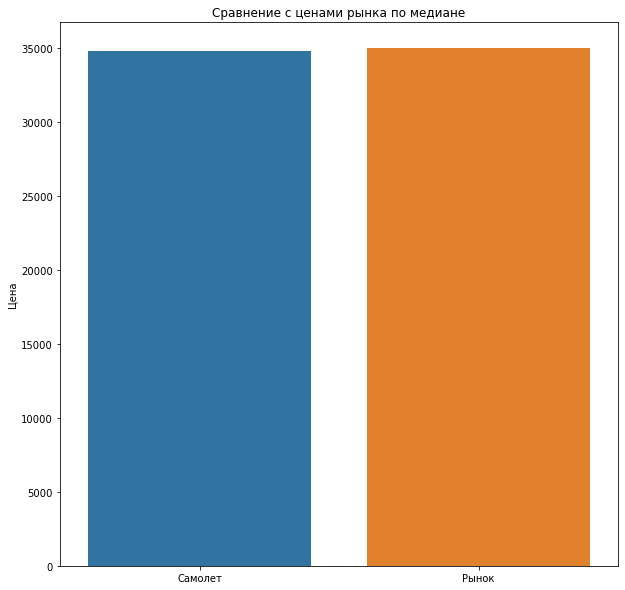

In [62]:
plt.figure(figsize=(10,10))
plt.title("Сравнение с ценами рынка по медиане")
sns.barplot(x=df_indicators['kind'], y=df_indicators['median'])
plt.xlabel("")
plt.ylabel("Цена")
plt.show()

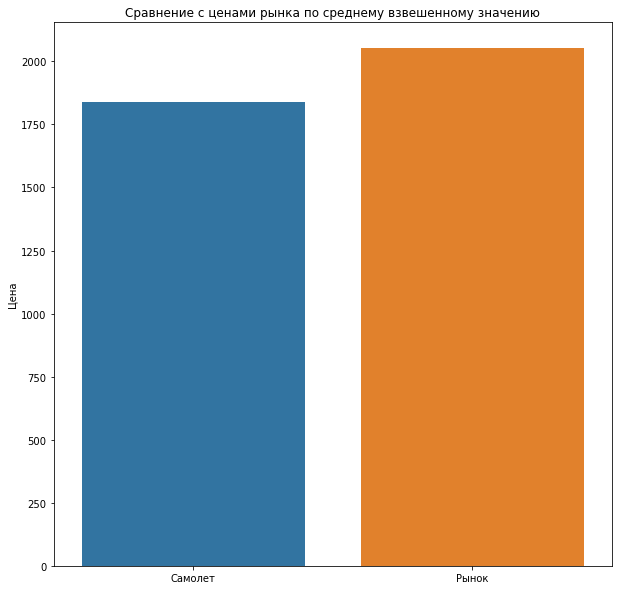

In [63]:
plt.figure(figsize=(10,10))
plt.title("Сравнение с ценами рынка по среднему взвешенному значению")
sns.barplot(x=df_indicators['kind'], y=df_indicators['weighted_average'])
plt.xlabel("")
plt.ylabel("Цена")
plt.show()

In [64]:
top5_good = df_market.sort_values('diff', ascending=False).head(6).reset_index(drop=True)
top5_good['material']= top5_good['material'].apply(str)
top5_good

,category,material,date,unit,amount,price,sum,marketprice,date_parsed,market_sum,diff
0,7,150,14.09.2020,т,0.01,28590,285.90,44490.0,2020-09,444.9,55.613851
1,7,226,26.03.2020,т,0.01,28067,280.67,39990.0,2020-03,399.9,42.480493
2,3,25,02.03.2021,т,0.31,47329,14671.99,66990.0,2021-03,20766.9,41.541127
3,7,300,10.09.2020,м3,310.00,3750,1162500.00,5305.0,2020-09,1644550.0,41.466667
4,7,300,10.09.2020,м3,106.50,3750,399375.00,5305.0,2020-09,564982.5,41.466667
5,7,813,23.07.2020,м3,75.00,3080,231000.00,4340.0,2020-07,325500.0,40.909091


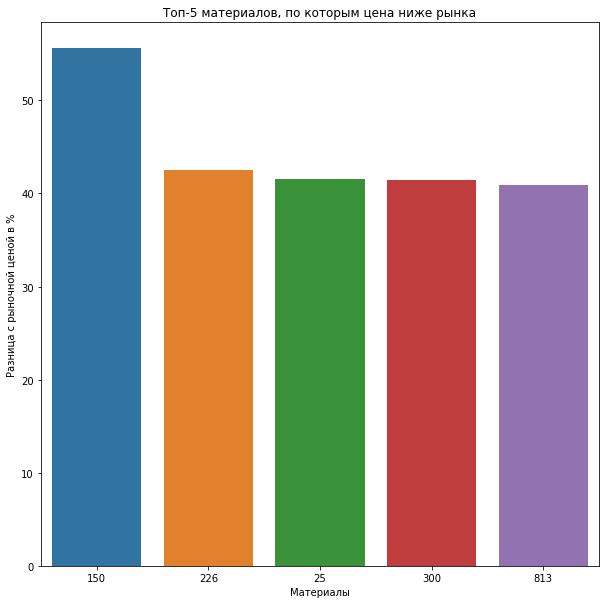

In [65]:
#Построим график «Топ-5 материалов, по которым цена ниже рынка»:
plt.figure(figsize=(10,10))
plt.title("Топ-5 материалов, по которым цена ниже рынка")
sns.barplot(x=top5_good['material'], y=top5_good['diff'])
plt.xlabel("Материалы")
plt.ylabel("Разница с рыночной ценой в %")
plt.show()

In [66]:
top10_bad = df_market.sort_values('diff', ascending=True).head(19).reset_index(drop=True)
top10_bad

,category,material,date,unit,amount,price,sum,marketprice,date_parsed,market_sum,diff
0,14,987,15.06.2020,шт.,7200.00,44,316800.00,20.0,2020-06,144000.0,-54.545455
1,14,987,25.05.2020,шт.,7200.00,44,316800.00,20.0,2020-05,144000.0,-54.545455
2,14,987,15.06.2020,шт.,7200.00,44,316800.00,20.0,2020-06,144000.0,-54.545455
3,14,987,07.08.2020,шт.,7680.00,24,184320.00,19.0,2020-08,145920.0,-20.833333
4,14,987,14.08.2020,шт.,7680.00,24,184320.00,19.0,2020-08,145920.0,-20.833333
5,14,987,07.08.2020,шт.,7680.00,24,184320.00,19.0,2020-08,145920.0,-20.833333
6,14,987,14.08.2020,шт.,7680.00,24,184320.00,19.0,2020-08,145920.0,-20.833333
7,14,987,11.08.2020,шт.,7680.00,24,184320.00,19.0,2020-08,145920.0,-20.833333
8,14,987,05.08.2020,шт.,7680.00,24,184320.00,19.0,2020-08,145920.0,-20.833333
9,14,987,05.08.2020,шт.,7680.00,24,184320.00,19.0,2020-08,145920.0,-20.833333


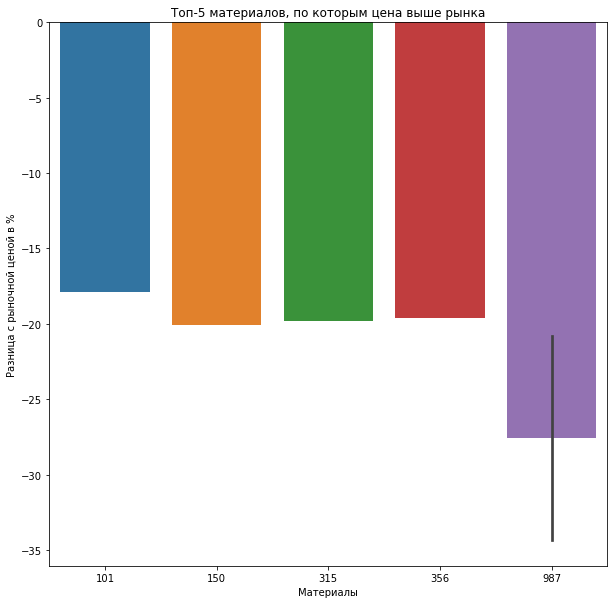

In [67]:
#Построим график «Топ-5 материалов, по которым цена выше рынка»:
plt.figure(figsize=(10,10))
plt.title("Топ-5 материалов, по которым цена выше рынка")
sns.barplot(x=top10_bad['material'], y=top10_bad['diff'])
plt.xlabel("Материалы")
plt.ylabel("Разница с рыночной ценой в %")
plt.show()